In [10]:
%run ./01_data_prep.ipynb
%run ./utils.ipynb
#data is stored in X_train, X_valid, y_train, y_valid

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [12]:
# Decision tree classifier
clf = DecisionTreeClassifier(max_depth=None)

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_valid)


In [13]:
# measure accuracy of classifier on validation split
metrics.accuracy_score(y_valid, y_pred)

0.9470280258700339

In [14]:
from sklearn.model_selection import GridSearchCV
import numpy as np
param_grid = {'max_depth' : np.arange(1, 15)}
# Cross validating data with 5 folds
dt_gs = GridSearchCV(clf, param_grid, cv=5, n_jobs=4)

dt_gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [15]:
# Check score when n = best value according to grid search
dt_gs.best_score_

0.95284108961789

In [16]:
# Check best value for max depth
dt_gs.best_params_

{'max_depth': 13}

In [23]:
p = list(range(1, 25))
lst_test =[]
lst_train =[]
for i in p:
    dt = DecisionTreeClassifier(max_depth = i)
    dt.fit(X_train, y_train)
    z = dt.score(X_valid, y_valid)
    t = dt.score(X_train, y_train)
    lst_test.append(z)
    lst_train.append(t)

In [24]:
import matplotlib.pyplot as plt

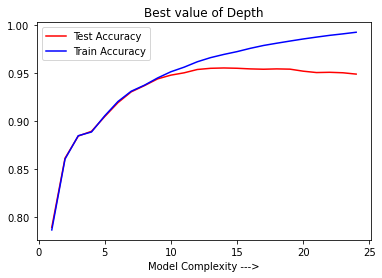

In [25]:
plt.plot(p, lst_test, color ='red', label ='Test Accuracy')
plt.plot(p, lst_train, color ='b', label ='Train Accuracy')
plt.xlabel('Model Complexity --->')
plt.title('Best value of Depth')
plt.legend()
plt.savefig('DT_complexity.png')

We achieve highest accuracy at max_depth = 13, which is the same result shown by GridSearch

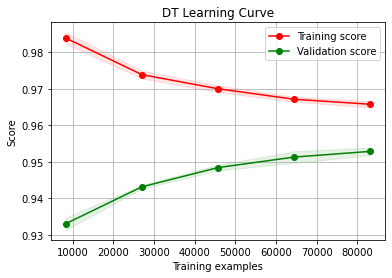

In [22]:
# Using max_depth = 13
model = DecisionTreeClassifier(max_depth = 13)

plot_learning_curve(model, "DT Learning Curve", X_train, y_train, n_jobs=4)
plt.savefig("learning_curve_DT.png")

Learning curve shows that the scores are starting to converge, but are not quite there, adding more data may result in a higher score.